# Importação das bibliotecas

In [163]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [164]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
#pasta_resultado_af_xdp= 'resultados_af_xdp2'
pasta_resultado_af_xdp= 'resultados_af_xdp3'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF e AF_XDP: ----------------
df_gerador_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_gerador.csv', sep=',', engine='python')
df_gerador_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_gerador.csv', sep=',', engine='python')

#normalizacao dos dados af_xdp
df_gerador_af_xdp['hook_ebpf']= df_gerador_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')

#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_gerador= pd.concat([df_gerador_ebpf,df_gerador_af_xdp], sort = False)


In [165]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

# Normalização dos datasets

In [166]:
#antes de executar isso, eliminar ultima coluna dos arquivos perf que estão em branco

#normalizacao para alterar o nome do algoritmo for_0_a_0 para base-line
#df_gerador['algoritmo']= df_gerador['algoritmo'].replace('for_0_a_0','base-line')
colunas= ['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'rx_packet_rate']
df_gerador= df_gerador[colunas]

df_gerador['hook_ebpf']= df_gerador['hook_ebpf'].replace('af_xdp','AF_XDP')
df_gerador['hook_ebpf']= df_gerador['hook_ebpf'].replace('xdpgeneric','Generic')
df_gerador['hook_ebpf']= df_gerador['hook_ebpf'].replace('xdpdrv','Native')

df_gerador['rx_packet_rate']= df_gerador['rx_packet_rate']*df_gerador['packet_size']
df_gerador['rx_packet_rate']= df_gerador['rx_packet_rate']/(1000000000)
df_gerador['rx_packet_rate']= df_gerador['rx_packet_rate']*8

for i,j in zip(lista_for,lista_alias_for):
       df_gerador['algoritmo']= df_gerador['algoritmo'].replace(f'{i}',f'{j}')

df_gerador['algoritmo']= df_gerador['algoritmo'].astype(int)

df_gerador

,combined,algoritmo,packet_size,hook_ebpf,rx_packet_rate
0,4,0,64,Native,6.542567
1,2,0,64,Native,6.406294
2,2,0,1024,Native,9.824356
3,1,0,64,Generic,0.551655
4,4,0,512,Generic,9.638546
...,...,...,...,...,...
231,8,1600,512,AF_XDP,0.423856
232,8,1600,64,AF_XDP,0.050455
233,1,1600,1500,AF_XDP,1.563981
234,2,1600,1500,AF_XDP,1.496427


# Resultados do gerador

In [167]:
format_imagens= '.pdf'
#format_imagens= '.jpg'

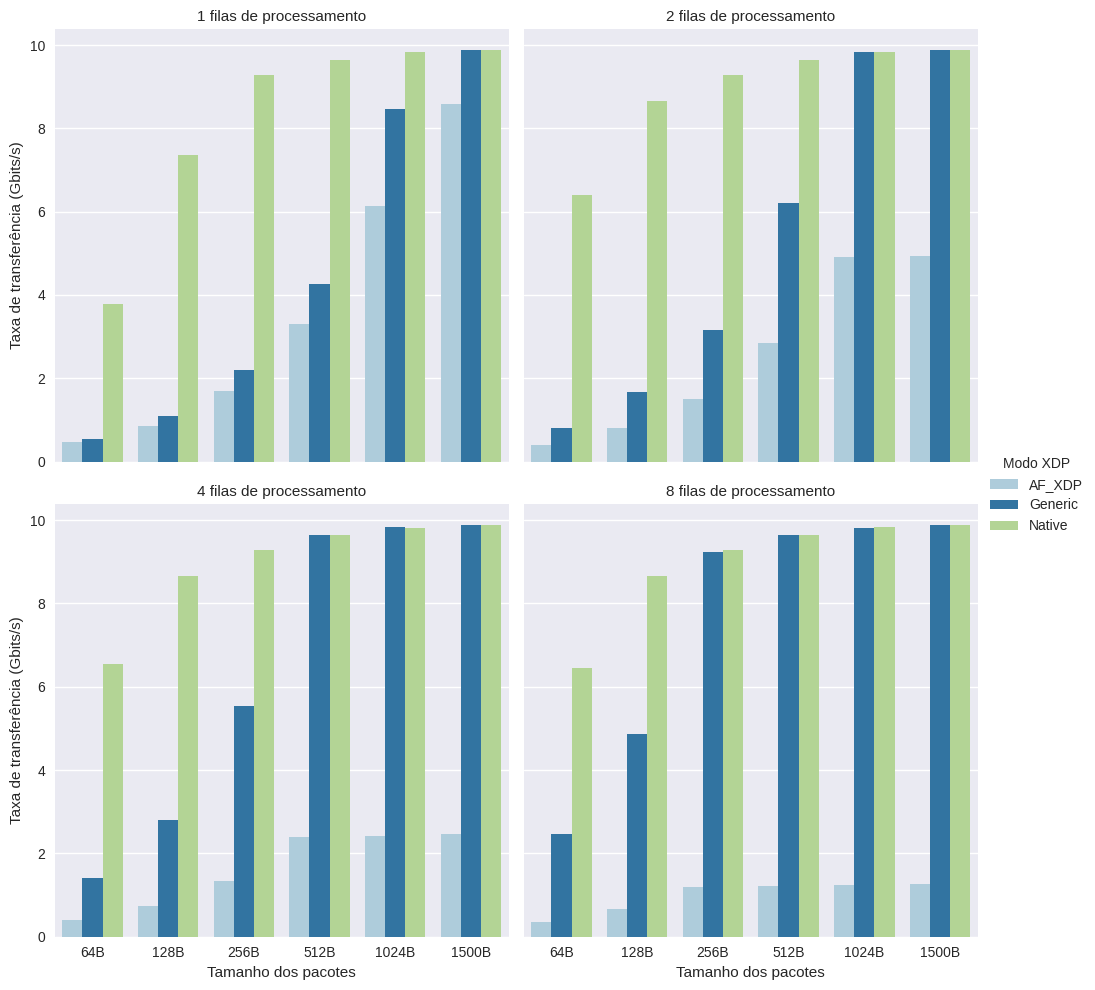

In [168]:
#Figura 17

algoritmo= 0
combined= 8
#packet_size= 1024
#hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(5, 5))
df_gerador= df_gerador.sort_values(by=[eixo_x,hue], ascending=True)       #ordena dados com os valores do eixo x

df= df_gerador.copy()
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
#df= df[df.combined == combined]                  #filtra por quantidade de filas TX/RX especifica
#df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
#df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico
df= df[[eixo_x, eixo_y, hue, 'combined']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})

df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='combined', hue='Modo XDP',
    kind="bar", palette='Paired', col_wrap=2
)
grafico.set_ylabels("Taxa de transferência (Gbits/s)")
grafico.set_xlabels("Tamanho dos pacotes")
grafico.set_titles("{col_name} filas de processamento")

#ax.set_ylabel('Taxa de transferência (Gbits/s)')
#ax.set_xlabel("Tamanho dos pacotes")

grafico.savefig(f'{raiz}/vazao_{hue}_x_{eixo_x}@alg_{algoritmo}{format_imagens}')

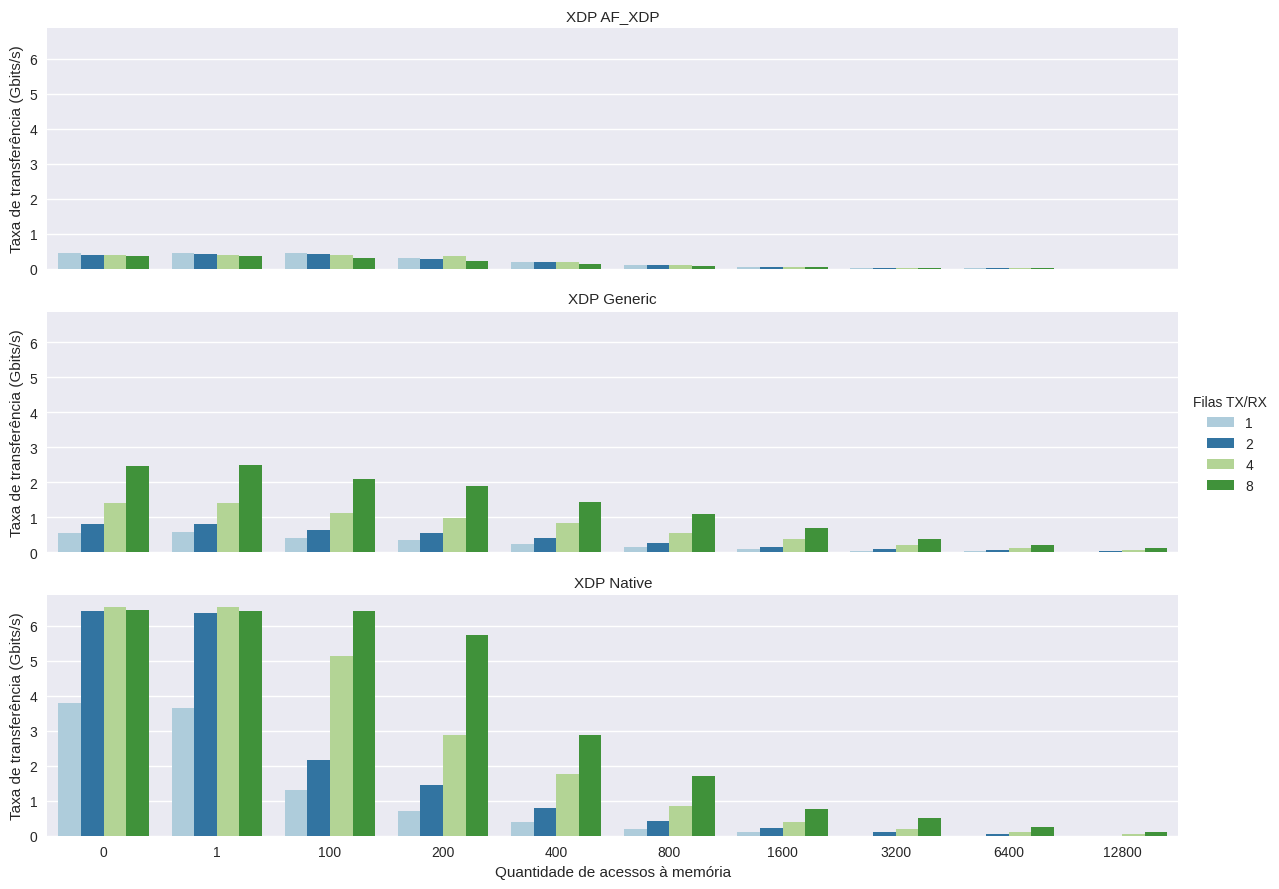

In [169]:
#Figura 18

from numpy import row_stack


algoritmo= 0
combined= 1
packet_size= 64
#hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(20, 5))
df_gerador= df_gerador.sort_values(by=[eixo_x,hue], ascending=True)       #ordena dados com os valores do eixo x

df= df_gerador.copy()
#df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
#df= df[df.combined > combined]                  #filtra por quantidade de filas TX/RX especifica
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
#df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico

df= df[[eixo_x, eixo_y, hue, 'hook_ebpf']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})
df = df.rename(columns={'combined': 'Filas TX/RX'})


df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='Modo XDP', hue='Filas TX/RX',
    kind="bar", palette='Paired', col_wrap=1,
    height= 3, aspect=12/3
)
grafico.set_ylabels("Taxa de transferência (Gbits/s)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")


grafico.savefig(f'{raiz}/vazao_{hue}_x_{eixo_x}@packet_size_{packet_size}{format_imagens}')

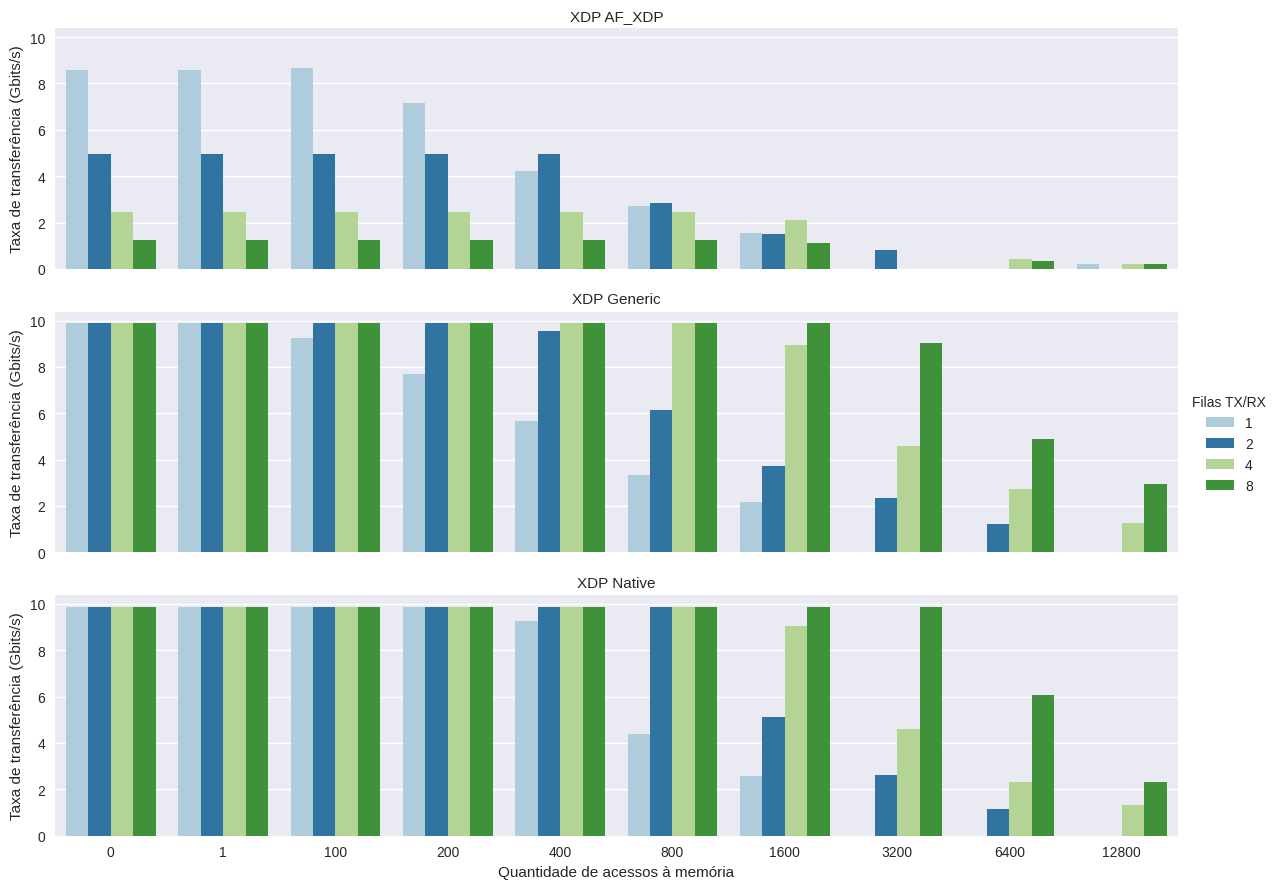

In [153]:
#Figura 19

from numpy import row_stack


algoritmo= 0
combined= 1
packet_size= 1500

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(20, 5))
df_gerador= df_gerador.sort_values(by=[eixo_x,hue], ascending=True)       #ordena dados com os valores do eixo x

df= df_gerador.copy()
#df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
#df= df[df.combined > combined]                  #filtra por quantidade de filas TX/RX especifica
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
#df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico

df= df[[eixo_x, eixo_y, hue, 'hook_ebpf']]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})
df = df.rename(columns={'combined': 'Filas TX/RX'})


df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='Modo XDP', hue='Filas TX/RX',
    kind="bar", palette='Paired', col_wrap=1,
    height= 3, aspect=12/3
)
grafico.set_ylabels("Taxa de transferência (Gbits/s)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")


grafico.savefig(f'{raiz}/vazao_{hue}_x_{eixo_x}@packet_size_{packet_size}{format_imagens}')

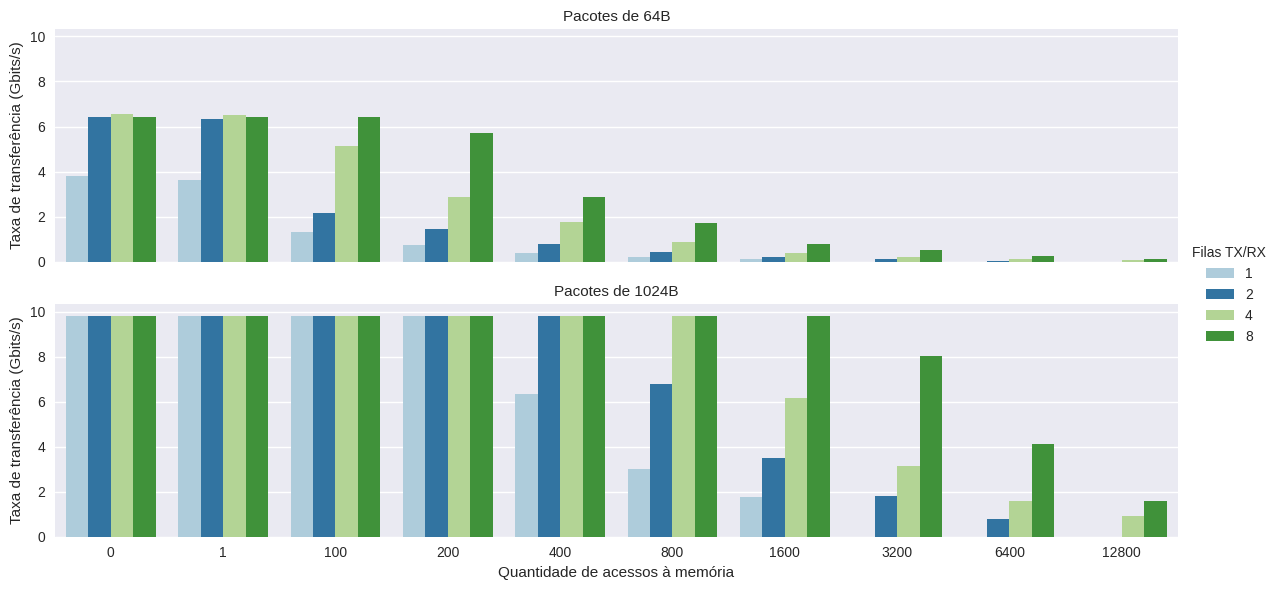

In [157]:
#Figura 20, 21 e 22

from numpy import row_stack

#hook_ebpf= 'AF_XDP'
#hook_ebpf= 'Generic'
hook_ebpf= 'Native'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(20, 5))
df_gerador= df_gerador.sort_values(by=[eixo_x,hue], ascending=True)       #ordena dados com os valores do eixo x

df= df_gerador.copy()
df= pd.concat([df[df.packet_size == 64], df[df.packet_size == 1024]], sort = False)
#df= df[df.algoritmo == algoritmo]                          #filtra por algoritmo especifico
#df= df[df.combined > combined]                             #filtra por quantidade de filas TX/RX especifica
#df= df[(df.packet_size == 64) & (df.packet_size == 1024)]            #filtra por tamanho de pacote especifico
df= df[df.hook_ebpf == hook_ebpf]                          #filtra por modo XDP especifico

df= df[[eixo_x, eixo_y, hue, 'packet_size']]
df = df.rename(columns={'combined': 'Filas TX/RX'})


df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='packet_size', hue='Filas TX/RX',
    kind="bar", palette='Paired', col_wrap=1,
    height= 3, aspect=12/3
)
grafico.set_ylabels("Taxa de transferência (Gbits/s)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("Pacotes de {col_name}B")


grafico.savefig(f'{raiz}/vazao_{hue}_x_{eixo_x}@hook_ebpf_{hook_ebpf}{format_imagens}')

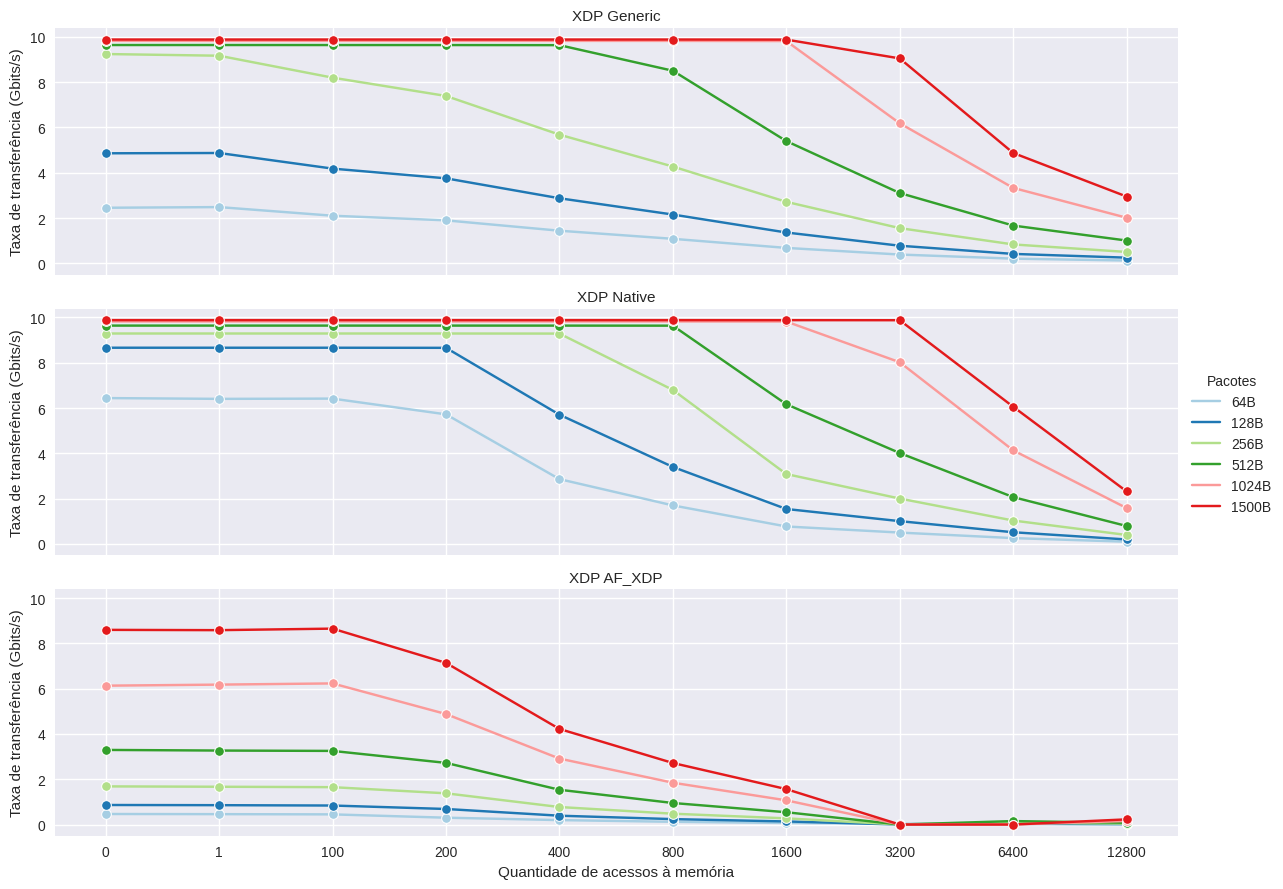

In [159]:
#Figura 23

from numpy import row_stack


hook_ebpf= 'AF_XDP'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(20, 5))
df_gerador= df_gerador.sort_values(by=[eixo_x,hue], ascending=True)       #ordena dados com os valores do eixo x

df= df_gerador.copy()
df1= pd.concat([df[df.hook_ebpf == 'Generic'], df[df.hook_ebpf == 'Native']], sort = False)
df1= df1[df1.combined == 8]

df2= df[df.combined == 1]
df2= df2[df2.hook_ebpf == 'AF_XDP']

df= pd.concat([df1, df2], sort = False)
df = df.rename(columns={'packet_size': 'Pacotes'})

df['Pacotes']= df['Pacotes'].astype(str)
df['algoritmo']= df['algoritmo'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['Pacotes']= df['Pacotes'].replace(f'{i}',f'{j}')


df= df[[eixo_x, eixo_y, 'Pacotes', 'hook_ebpf']]


df.index= range(len(df))
grafico = sns.relplot(
    data=df, x=eixo_x, y=eixo_y,
    col='hook_ebpf', hue='Pacotes',
    kind="line", palette='Paired', col_wrap=1, marker='o',
    height= 3, aspect=12/3
)
grafico.set_ylabels("Taxa de transferência (Gbits/s)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")


grafico.savefig(f'{raiz}/vazao_{hue}_x_{eixo_x}@combined_melhores_por_modo_xdp{format_imagens}')

In [93]:

df

,algoritmo,rx_packet_rate,packet_size,hook_ebpf
0,base-line,4.796657,64,Generic
1,base-line,4.746977,128,Generic
2,base-line,4.513338,256,Generic
3,base-line,2.353716,512,Generic
4,base-line,1.199276,1024,Generic
...,...,...,...,...
175,for_0_a_12800,0.019062,128,AF_XDP
176,for_0_a_12800,0.019047,256,AF_XDP
177,for_0_a_12800,0.019039,512,AF_XDP
178,for_0_a_12800,0.018992,1024,AF_XDP


# Alguns testes de gráficos

a) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo base-line nos diferentes modos ebpf?

b) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo com baixa complexidade (100 iterações) nos diferentes modos ebpf?

c) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo com média complexidade (1600 iterações) nos diferentes modos ebpf?

d) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para o algoritmo com alta complexidade (12800 iterações) nos diferentes modos ebpf?

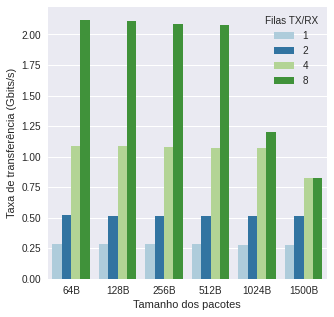

In [255]:
algoritmo= 400
combined= 8
packet_size= 64
hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(5, 5))
df_gerador= df_gerador.sort_values(by=[eixo_x], ascending=True)       #ordena dados com os valores do eixo x

df= df_gerador.copy()
df['packet_size']= df['packet_size'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['packet_size']= df['packet_size'].replace(f'{i}',f'{j}')
       
df= df[df.algoritmo == algoritmo]                #filtra por algoritmo especifico
#df= df[df.combined == combined]                  #filtra por quantidade de filas TX/RX especifica
df= df[df.packet_size == packet_size]            #filtra por tamanho de pacote especifico
df= df[df.hook_ebpf == hook_ebpf]                #filtra por modo XDP especifico
df['rx_packet_rate']= df['rx_packet_rate']/1000000       #divisao por 1 Gbit
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');                      #grafico de barras
#ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired', marker='o');        #grafico de linhas
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel("Tamanho dos pacotes")
ax.legend(title = 'Filas TX/RX')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_packet_size@algoritmo_{algoritmo}_hook_ebpf_{hook_ebpf}{format_imagens}')


e) Qual a ***Taxa de Transferência*** que as filas TX/RX de processamento conseguem obter para cada modo xdp nos diferentes algoritmos?

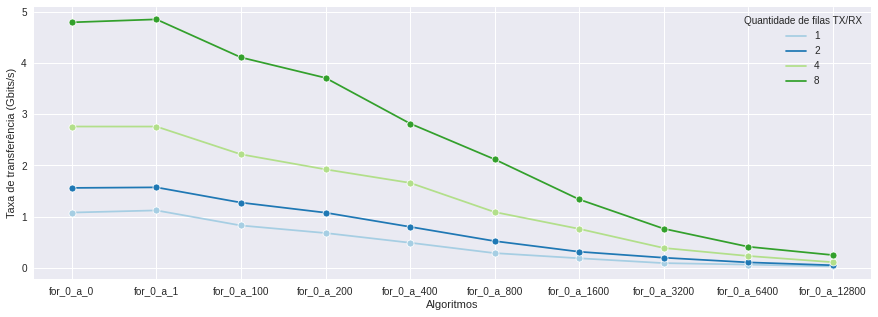

In [81]:
#Analise individual por pacote e modo xdp:
packet_size= 64
hook_ebpf= 'xdpgeneric'
#hook_ebpf= 'xdpdrv'
#hook_ebpf= 'af_xdp'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(15,5))
df= df_gerador.copy()

df= df[df.packet_size == packet_size]
df= df[df.hook_ebpf == hook_ebpf]
df['rx_packet_rate']= df['rx_packet_rate']/1000000
df= df.sort_values(by=[eixo_x], ascending=True)

df['algoritmo']= df['algoritmo'].astype(str)
for i,j in zip(lista_alias_for,lista_for):
       df['algoritmo']= df['algoritmo'].replace(f'{i}',f'{j}')


df= df[[eixo_x, eixo_y, hue]]

ax = sns.lineplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired', marker='o');
#ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel("Algoritmos")
#ax.set_xticklabels(lista_for)
ax.legend(title = 'Quantidade de filas TX/RX')

save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_algoritmo@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

### 1.2 Qual a ***Latência*** que as filas TX/RX de processamento obtem?

In [1]:
algoritmo= 12800
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'latencymean'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.algoritmo == algoritmo]
df= df[df.hook_ebpf == hook_ebpf]
df= df.sort_values(by=[hue,eixo_x], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes tamanhos de pacotes,\nalgoritmo = {algoritmo}, hook XDP = {hook_ebpf}', fontsize=12, pad=20);
ax.set_ylabel('Latência (ms)')
ax.set_xlabel("Tamanho dos pacotes")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_packet_size@algoritmo_{algoritmo}_hook_ebpf_{hook_ebpf}{format_imagens}')

NameError: name 'plt' is not defined

## 2. Modos de hook XDP

### 2.1 Qual a ***Vazão*** obtida por cada modo XDP?

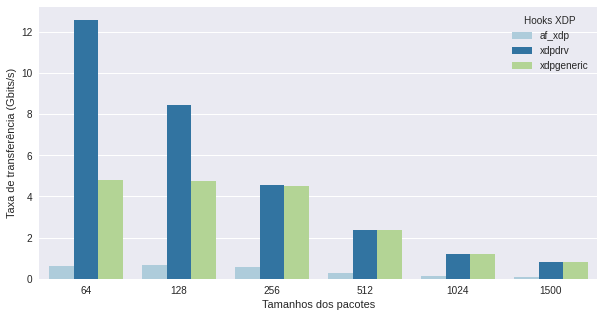

In [222]:
combined= 8
algoritmo= 0

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.combined == combined]
df= df[df.algoritmo == algoritmo]
df['rx_packet_rate']= df['rx_packet_rate']/1000000
df= df.sort_values(by=[hue,eixo_y], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Tamanhos dos pacotes')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_tam_packets@combined{combined}_algoritmo_{algoritmo}{format_imagens}')

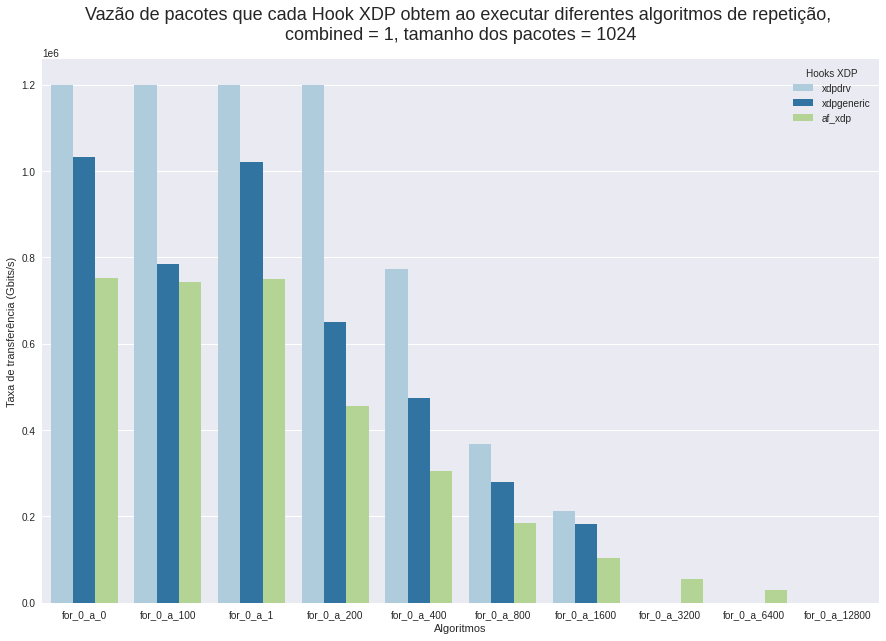

In [142]:
combined=1
packet_size= 1024

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(15, 10))
df= df_gerador[df_gerador.combined == combined]
df= df[df.packet_size == packet_size]
df= df.sort_values(by=[eixo_y,eixo_x], ascending=False)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem ao executar diferentes algoritmos de repetição, \ncombined = {combined}, tamanho dos pacotes = {packet_size}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Algoritmos')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_{hue}_para_dif_{eixo_x}@combined_{combined}_packet_size_{packet_size}{format_imagens}')

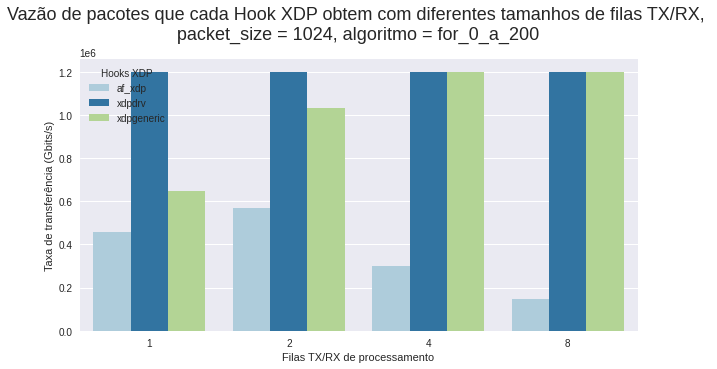

In [101]:
packet_size= 1024
algoritmo= 'for_0_a_200'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.packet_size == packet_size]
df= df[df.algoritmo == algoritmo]
df= df.sort_values(by=[hue,eixo_x], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem com diferentes tamanhos de filas TX/RX, \npacket_size = {packet_size}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_combined@packet_size{packet_size}_algoritmo_{algoritmo}{format_imagens}')

### 3.1 Qual a ***Vazão*** obtida por laço de repetição

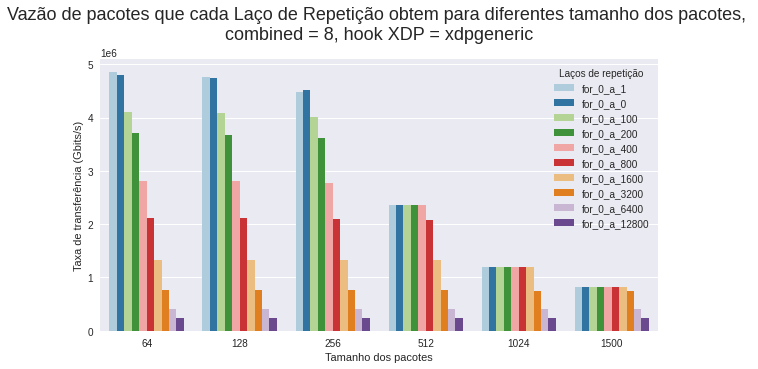

In [154]:
combined=8
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.combined == combined]
df= df[df.hook_ebpf == hook_ebpf]
df= df.sort_values(by=[eixo_y,hue], ascending=False)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem para diferentes tamanho dos pacotes, \ncombined = {combined}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Tamanho dos pacotes')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_packet_size@combined_{combined}_hook_ebpf_{hook_ebpf}{format_imagens}')

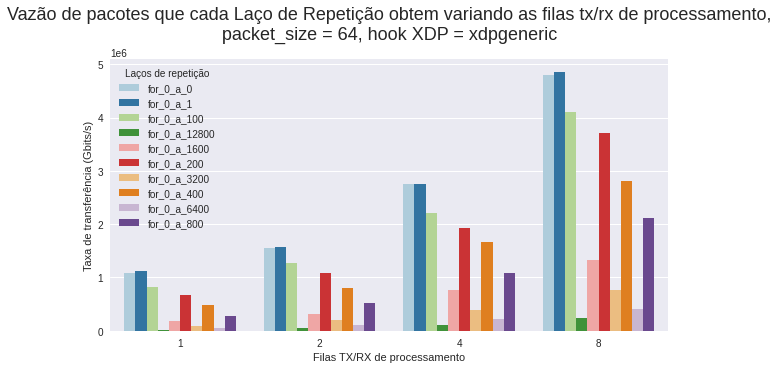

In [105]:
packet_size=64
hook_ebpf= 'xdpgeneric'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.packet_size == packet_size]
df= df[df.hook_ebpf == hook_ebpf]
df= df.sort_values(by=[hue,eixo_x], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem variando as filas tx/rx de processamento,\npacket_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_combined@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

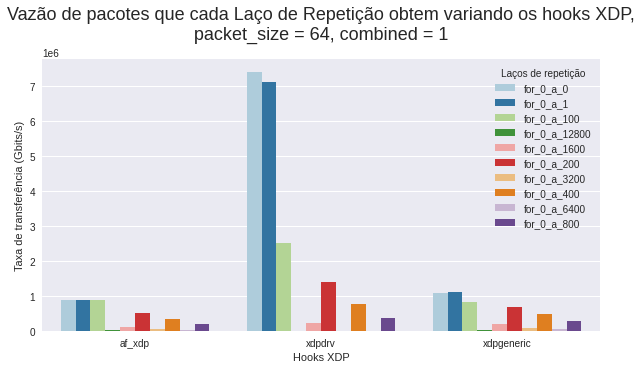

In [106]:
packet_size=64
combined= 1

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.packet_size == packet_size]
df= df[df.combined == combined]
df= df.sort_values(by=[hue,eixo_x], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem variando os hooks XDP,\npacket_size = {packet_size}, combined = {combined}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Hooks XDP')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_hook_ebpf@packet_size_{packet_size}_combined_{combined}{format_imagens}')

### 4.1 Qual a ***Vazão*** obtida por tamanho de pacote 

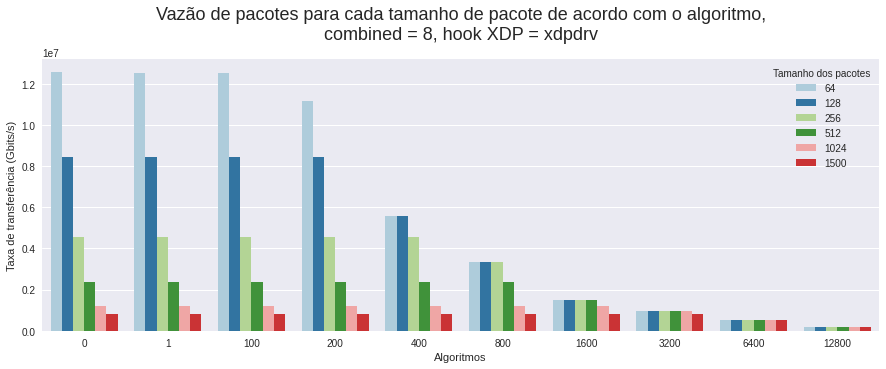

In [7]:
combined=8
hook_ebpf= 'xdpdrv'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(15, 5))
df= df_gerador[df_gerador.combined == combined]
df= df[df.hook_ebpf == hook_ebpf]
df= df.sort_values(by=[hue,eixo_x], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com o algoritmo,\ncombined = {combined}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Algoritmos')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_for@combined_{combined}_hook_ebpf_{hook_ebpf}{format_imagens}')

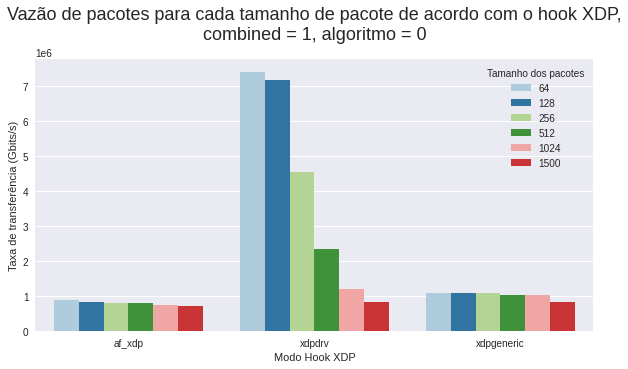

In [11]:
combined=1
algoritmo= 0

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.combined == combined]
df= df[df.algoritmo == algoritmo]
df= df.sort_values(by=[hue,eixo_x], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com o hook XDP,\ncombined = {combined}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Modo Hook XDP')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_hook_ebpf@combined_{combined}_algoritmo_{algoritmo}{format_imagens}')

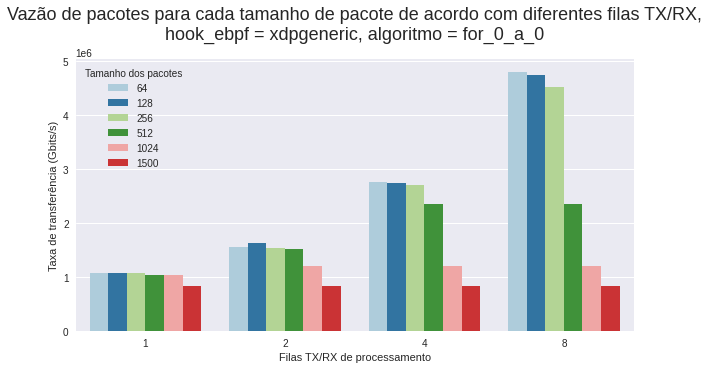

In [109]:
hook_ebpf= 'xdpgeneric'
algoritmo= 'for_0_a_0'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df= df_gerador[df_gerador.hook_ebpf == hook_ebpf]
df= df[df.algoritmo == algoritmo]
df= df.sort_values(by=[hue,eixo_x], ascending=True)
df= df[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com diferentes filas TX/RX,\nhook_ebpf = {hook_ebpf}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência (Gbits/s)')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_hook_ebpf@hook_ebpf_{hook_ebpf}_algoritmo_{algoritmo}{format_imagens}')